<a href="https://colab.research.google.com/github/kosirobwada/KaggleDeepLearningBook/blob/main/2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from sklearn.datasets import load_digits
from torch.utils.data import DataLoader, TensorDataset

In [4]:
digits = load_digits()
X = digits.data
y = digits.target

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=64, shuffle=False)

In [5]:
def train_1epoch(model, train_loader, lossfun, optimizer, device):
  model.train()
  total_loss, total_acc = 0.0, 0.0

  for x,y in tqdm(train_loader):
    x = x.to(device)
    y = y.to(device)

    optimizer.zero_grad()
    out = model(x)

    loss = lossfun(out, y)
    loss.backward()

    optimizer.step()

    total_loss += loss.item() * x.size(0)

    _, pred = torch.max(out,1)
    total_acc += torch.sum(pred==y.data)

  avg_loss = total_loss / len(train_loader.dataset)
  avg_acc = total_acc / len(train_loader.dataset)
  return avg_acc, avg_loss

In [6]:
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# 1. Define the model
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Instantiate the model
input_dim = 64  # Number of input features (64 for the digits dataset)
hidden_dim = 32
output_dim = 10  # Number of classes (0-9 for the digits dataset)
model = SimpleNN(input_dim, hidden_dim, output_dim)

# 2. Define the loss function
lossfun = nn.CrossEntropyLoss()

# 3. Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 4. Specify device (CPU for this example, use 'cuda' for GPU)
device = 'cpu'

# Training for one epoch
avg_acc, avg_loss = train_1epoch(model, dataloader, lossfun, optimizer, device)

print(f"Average Accuracy: {avg_acc:.4f}, Average Loss: {avg_loss:.4f}")


100%|██████████| 29/29 [00:00<00:00, 180.40it/s]

Average Accuracy: 0.3717, Average Loss: 1.9913


In [7]:
num_epochs = 50  # For example, train for 50 epochs
losses = []

for epoch in range(num_epochs):
    _, avg_loss = train_1epoch(model, dataloader, lossfun, optimizer, device)
    losses.append(avg_loss)

    # Optionally, print the average loss for the epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")


100%|██████████| 29/29 [00:00<00:00, 676.09it/s]


Epoch 1/50, Loss: 0.9565


100%|██████████| 29/29 [00:00<00:00, 723.58it/s]


Epoch 2/50, Loss: 0.5869


100%|██████████| 29/29 [00:00<00:00, 730.39it/s]


Epoch 3/50, Loss: 0.4216


100%|██████████| 29/29 [00:00<00:00, 714.62it/s]


Epoch 4/50, Loss: 0.3376


100%|██████████| 29/29 [00:00<00:00, 521.02it/s]


Epoch 5/50, Loss: 0.2860


100%|██████████| 29/29 [00:00<00:00, 532.65it/s]


Epoch 6/50, Loss: 0.2506


100%|██████████| 29/29 [00:00<00:00, 620.34it/s]


Epoch 7/50, Loss: 0.2245


100%|██████████| 29/29 [00:00<00:00, 514.10it/s]


Epoch 8/50, Loss: 0.2040


100%|██████████| 29/29 [00:00<00:00, 606.02it/s]


Epoch 9/50, Loss: 0.1875


100%|██████████| 29/29 [00:00<00:00, 593.20it/s]


Epoch 10/50, Loss: 0.1737


100%|██████████| 29/29 [00:00<00:00, 671.11it/s]


Epoch 11/50, Loss: 0.1620


100%|██████████| 29/29 [00:00<00:00, 614.06it/s]


Epoch 12/50, Loss: 0.1520


100%|██████████| 29/29 [00:00<00:00, 557.78it/s]


Epoch 13/50, Loss: 0.1432


100%|██████████| 29/29 [00:00<00:00, 598.84it/s]


Epoch 14/50, Loss: 0.1354


100%|██████████| 29/29 [00:00<00:00, 656.82it/s]


Epoch 15/50, Loss: 0.1286


100%|██████████| 29/29 [00:00<00:00, 684.35it/s]


Epoch 16/50, Loss: 0.1222


100%|██████████| 29/29 [00:00<00:00, 703.83it/s]


Epoch 17/50, Loss: 0.1166


100%|██████████| 29/29 [00:00<00:00, 624.81it/s]


Epoch 18/50, Loss: 0.1116


100%|██████████| 29/29 [00:00<00:00, 627.57it/s]


Epoch 19/50, Loss: 0.1069


100%|██████████| 29/29 [00:00<00:00, 635.51it/s]


Epoch 20/50, Loss: 0.1026


100%|██████████| 29/29 [00:00<00:00, 582.95it/s]


Epoch 21/50, Loss: 0.0987


100%|██████████| 29/29 [00:00<00:00, 464.24it/s]


Epoch 22/50, Loss: 0.0951


100%|██████████| 29/29 [00:00<00:00, 483.72it/s]


Epoch 23/50, Loss: 0.0917


100%|██████████| 29/29 [00:00<00:00, 551.83it/s]


Epoch 24/50, Loss: 0.0885


100%|██████████| 29/29 [00:00<00:00, 604.64it/s]


Epoch 25/50, Loss: 0.0855


100%|██████████| 29/29 [00:00<00:00, 602.16it/s]


Epoch 26/50, Loss: 0.0828


100%|██████████| 29/29 [00:00<00:00, 692.11it/s]


Epoch 27/50, Loss: 0.0802


100%|██████████| 29/29 [00:00<00:00, 413.59it/s]


Epoch 28/50, Loss: 0.0778


100%|██████████| 29/29 [00:00<00:00, 576.52it/s]


Epoch 29/50, Loss: 0.0755


100%|██████████| 29/29 [00:00<00:00, 680.47it/s]


Epoch 30/50, Loss: 0.0734


100%|██████████| 29/29 [00:00<00:00, 521.40it/s]


Epoch 31/50, Loss: 0.0713


100%|██████████| 29/29 [00:00<00:00, 664.84it/s]


Epoch 32/50, Loss: 0.0694


100%|██████████| 29/29 [00:00<00:00, 587.78it/s]


Epoch 33/50, Loss: 0.0675


100%|██████████| 29/29 [00:00<00:00, 480.18it/s]


Epoch 34/50, Loss: 0.0658


100%|██████████| 29/29 [00:00<00:00, 509.31it/s]


Epoch 35/50, Loss: 0.0642


100%|██████████| 29/29 [00:00<00:00, 480.37it/s]


Epoch 36/50, Loss: 0.0626


100%|██████████| 29/29 [00:00<00:00, 548.08it/s]


Epoch 37/50, Loss: 0.0610


100%|██████████| 29/29 [00:00<00:00, 529.83it/s]


Epoch 38/50, Loss: 0.0596


100%|██████████| 29/29 [00:00<00:00, 474.67it/s]


Epoch 39/50, Loss: 0.0582


100%|██████████| 29/29 [00:00<00:00, 439.45it/s]


Epoch 40/50, Loss: 0.0570


100%|██████████| 29/29 [00:00<00:00, 533.75it/s]


Epoch 41/50, Loss: 0.0557


100%|██████████| 29/29 [00:00<00:00, 668.81it/s]


Epoch 42/50, Loss: 0.0545


100%|██████████| 29/29 [00:00<00:00, 687.56it/s]


Epoch 43/50, Loss: 0.0533


100%|██████████| 29/29 [00:00<00:00, 538.76it/s]


Epoch 44/50, Loss: 0.0522


100%|██████████| 29/29 [00:00<00:00, 618.91it/s]


Epoch 45/50, Loss: 0.0511


100%|██████████| 29/29 [00:00<00:00, 639.93it/s]


Epoch 46/50, Loss: 0.0501


100%|██████████| 29/29 [00:00<00:00, 616.48it/s]


Epoch 47/50, Loss: 0.0491


100%|██████████| 29/29 [00:00<00:00, 651.43it/s]


Epoch 48/50, Loss: 0.0482


100%|██████████| 29/29 [00:00<00:00, 628.83it/s]


Epoch 49/50, Loss: 0.0472


100%|██████████| 29/29 [00:00<00:00, 647.32it/s]

Epoch 50/50, Loss: 0.0464


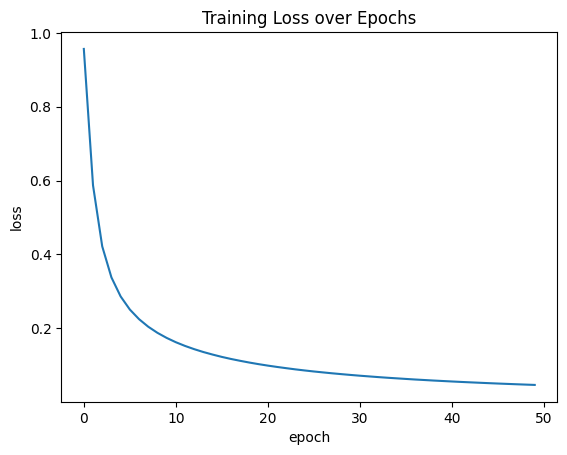

In [8]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training Loss over Epochs')
plt.show()
